In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split

In [2]:
def load_data(dataset, file_paths):

    images = []
    titles = []
    
    print("Loading {}".format(dataset))
    
    # Iterate through each image in folder
    for file in tqdm(file_paths):

        # Get the path name of the image
        img_path = os.path.join(dataset, file)

        # Open and resize the img
        image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        # image = mpimg.imread(img_path)

        # Append the image and its corresponding label to the output
        images.append(image)
        titles.append(file)
            
#     images = np.array(images, dtype = 'float32')
#     labels = np.array(labels, dtype = 'int32')   
    
    return images, titles

In [3]:
def display_images(images, true_labels, pred_labels):
    class_names = ['Normal','Cataract','Myopia']
    plt.figure(figsize=(10,15))
    for i in range(15):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel("Actual:{}\nPrediction:{}".format(class_names[true_labels[i]], class_names[pred_labels[i]]))
    plt.show()

In [4]:
def normalize(image, label):
    
    input_image = tf.image.resize(image, (128, 128)) / 255.0
    
    # if tf.random.uniform(()) > 0.5:
    input_image = tf.image.adjust_brightness(input_image, 0.3)
    
    return input_image, label

In [5]:
# read in file names and corresponding labels
full_df = pd.read_csv('archive/full_df.csv')
# print(full_df['labels'].value_counts())

In [6]:
full_df = full_df[full_df['labels'].isin(["['N']","['C']","['M']"])].reset_index()

In [7]:
# define data directories
image_path = 'archive/preprocessed_images/'

# load data
images, titles = load_data(image_path, list(full_df['filename']))

  0%|          | 14/3398 [00:00<00:24, 135.37it/s]

Loading archive/preprocessed_images/


100%|██████████| 3398/3398 [00:18<00:00, 185.84it/s]


In [8]:
class_names = {"['N']":0, "['C']":1, "['M']":2}

labels = list(full_df['labels'].map(class_names))

In [9]:
train_images, test_images, train_labels, test_labels = train_test_split(np.array(images), 
                                                                        np.array(labels), test_size=0.2, 
                                                                        random_state=25)

train = (train_images, train_labels)
test = (test_images, test_labels)

# Load Best Model

In [10]:
model = tf.keras.models.load_model('best_model')

# Predict Images

In [11]:
pred_labels = []

valid_set = tf.data.Dataset.from_tensor_slices(test)
valid_set = valid_set.map(normalize).batch(1)

for image, label in tqdm(valid_set.take(15)):
    predictions = model.predict(image) 
    pred_labels.append(np.argmax(predictions, axis = 1)[0])

15it [00:01,  8.36it/s]


# Display Images

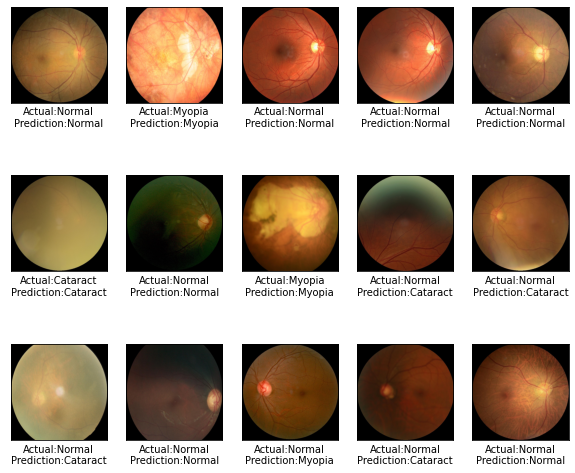

In [12]:
display_images(test_images, test_labels, pred_labels)